**Author: Prashant Jeswani Tejwani**

In [3]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

### Paso 1: definir términos y variables lingüísticas

Las variables lingüísticas son variables de entrada y salida en forma de palabras u oraciones simples. Para temperatura ambiente, frío, tibio, caliente, etc., son términos lingüísticos.

                        Temperatura (t) = {muy fría, fría, tibia, muy tibia, caliente}

Cada miembro de este conjunto es un término lingüístico y puede cubrir una parte de los valores generales de temperatura.

In [4]:
# Temperature = {very_cold, cold, warm, hot, very_hot}
temperature = ctrl.Antecedent(np.arange(0, 41, 0.1), 'temperature')
# Target = {very_cold, cold, warm, hot, very_hot}
target = ctrl.Antecedent(np.arange(0, 11, 0.1), 'target')
# Change = {heat, no_change, cool} 
change = ctrl.Consequent(np.arange(0, 51, 1), 'change')

### Paso 2: construya funciones de pertenencia para ellos

Las funciones de pertenencia de la variable de temperatura son las que se muestran

In [6]:
# Auto-membership function population and changing labels
temperature.automf(5)
names = ['very_cold', 'cold', 'warm', 'hot', 'very_hot']
temperature.automf(names=names)
target.automf(names=names)

In [7]:
change['cool'] = fuzz.trimf(change.universe, [0, 0, 20])
change['no_change'] = fuzz.trimf(change.universe, [18, 28, 32])
change['heat'] = fuzz.trimf(change.universe, [30, 50, 50])

c:\python\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\python\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\python\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


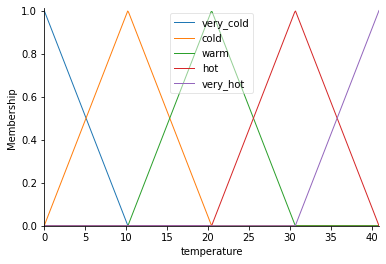

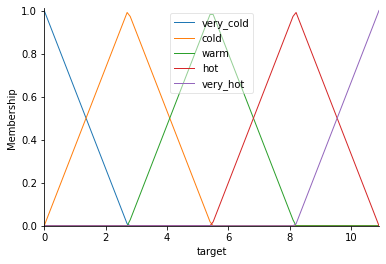

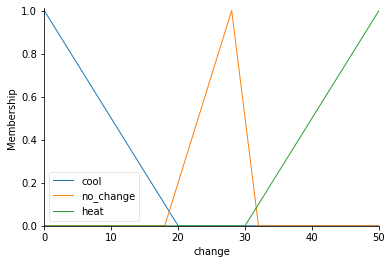

In [8]:
# You can see how these look with .view()
temperature.view()
target.view()
change.view()

plt.show()

### Paso 3: construya las reglas de la base de conocimientos

Cree una matriz de valores de temperatura ambiente frente a los valores de temperatura objetivo que se espera que proporcione un sistema de aire acondicionado.
Cree un conjunto de reglas en la base de conocimientos

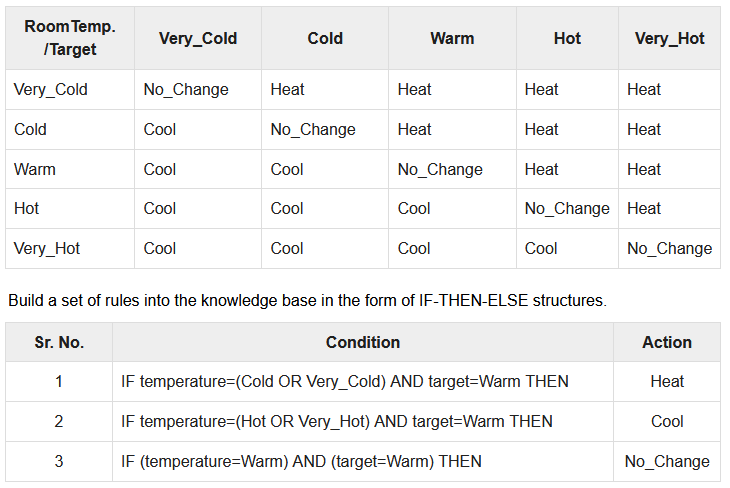

In [9]:
# Some rules examples
rule1 = ctrl.Rule(temperature['cold'] | temperature['very_cold'] & target['warm'], change['heat'])
rule2 = ctrl.Rule(temperature['hot'] | temperature['very_hot'] & target['warm'], change['cool'])
rule3 = ctrl.Rule(temperature['warm'] & target['warm'], change['no_change'])

In [11]:
# Create system
temperature_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
air_conditioner = ctrl.ControlSystemSimulation(temperature_ctrl)

### Paso 4: obtener un valor difuso

Las operaciones de conjuntos difusos realizan la evaluación de reglas. Las operaciones utilizadas para OR y AND son Max y Min respectivamente. Combine todos los resultados de la evaluación para formar un resultado final. Este resultado es un valor difuso.

### Paso 5: realizar la defuzzificación

La defuzzificación se realiza luego de acuerdo con la función de pertenencia para la variable de salida.

27.533274919999496


c:\python\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


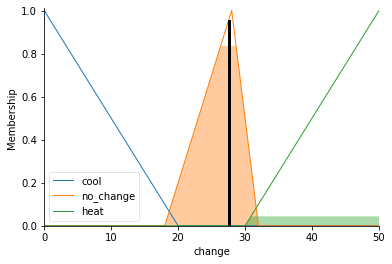

In [13]:
# Pass example inputs to the ControlSystem using Antecedent labels 
air_conditioner.input['temperature'] = 20
air_conditioner.input['target'] = 5

# Compute
air_conditioner.compute()

# Print result
print(air_conditioner.output['change'])
change.view(sim=air_conditioner)

plt.show()